In [16]:
# Importing all the necessary libraries
from sklearn.datasets import load_iris
#This line import the datasets load_iris from sklearn

from sklearn.neighbors import KNeighborsClassifier
#KNeighborsClassifier is a classifier algo based on the k-nearest neighbors approach

from sklearn.model_selection import cross_val_score
#cross_val_score is a function that performs cross validation, which helps evalute the performance of a machine learning model by splitting data into training and test sets multiple times.

from sklearn.model_selection import train_test_split
#train_test_split is used to split the dataset into training and testing subsets, allowing us to evaluate the model's performance on unseen data.

from sklearn.metrics import confusion_matrix
#confusion_matrix is used to calculate the confusion matrix, which helps analyze the performance of a classification model by comparing predicted labels with true labels.

import matplotlib.pyplot as plt

%matplotlib inline
#This is called a magic command in Jupyter Notebook or IPython. It enables inline plotting, which means that plots created using matplotlib.pyplot will be displayed directly in the notebook or IPython console output.


X and y are the assigned variables for data and target.
Each row in X represents a sample (an iris flower), and each column represents a feature.
The irisData.target attribute represents the target labels, which are the class labels for each iris flower. 

In [17]:
# Loading data 
irisData = load_iris() 

# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
  
# Printing Data shape    
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (150, 4)
Y vector dimensionality: (150,)


In [18]:
# Split into training dataset and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)

In [19]:
# Model Building
knn = KNeighborsClassifier(n_neighbors=4) 
# The n_neighbors parameter is set to 4, which specifies the number of neighbors used for classification. It determines how many neighboring samples are considered when making predictions.
# Here we can specify 4 things: n_neighbors, weights, algorithm and metric.
  
# Fitting the model
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
#The predict() method is called on the trained knn model to make predictions on unseen data. Here, X_test represents the feature data of a dataset that the model has not seen during training.
y_pred = knn.predict(X_test)
print(y_pred)

[1 2 2 0 2 1 0 2 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 2 1 2 1 1 1 2 0 1 1 0 1 0 0
 2]


In [20]:
#making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 12]], dtype=int64)

A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions. It is a useful tool for evaluating the accuracy and reliability of a classification model.

In [21]:
#15- fold (cv= 15) cross-validation with k = 4 (neighbors =4) for KNN (the n_neighbors parameter)

#Instantiate model 
knn = KNeighborsClassifier(n_neighbors = 4)

#cross_val_score takes care of the splitting x and y into the 15 folds that's why (we) pass x and y entirely instead of x_train and y_train
scores = cross_val_score(knn, X, y, cv = 15, scoring = 'accuracy')
print(scores)

[1.  1.  0.9 1.  1.  1.  0.7 1.  1.  0.9 0.9 1.  1.  1.  1. ]


cv: The number of folds or subdivisions of the data for cross-validation. Here, it is set to 15, indicating that the data will be divided into 15 parts for cross-validation.
scoring: The scoring metric used to evaluate the model's performance. In this case, it is set to 'accuracy', which measures the proportion of correctly classified instances.

In [22]:
#mean score
print(scores.mean())

0.9600000000000001


A range object is created using the range() function. The range starts from 1 and ends at 14 (15 is excluded). This range represents the values of k that will be tested in the subsequent code.The purpose of this range is to specify the values of k (number of neighbors) that will be evaluated to determine the optimal value for the K-nearest neighbors algorithm.
In this line of code, an empty list named k_scores is created. This list will be used to store the scores obtained from evaluating the K-nearest neighbors algorithm for different values of k.
The purpose of this list is to collect and store the performance scores of the algorithm for each k value tested. These scores can later be analyzed or visualized to identify the value of k that provides the best performance for the given task.

In [24]:
#searching for an optimal val of k for KNN

#list of scores from k_range
k_range = range(1, 15)

#list to store score
k_scores= []

#looping through values of k
# This loop will iterate over the specified range of k values, allowing to evaluate the K-nearest neighbors algorithm for different numbers of neighbors.
for k in k_range:
    
    #running KNeighborsClassifier with k neighbors
    #The n_neighbors parameter is set to the current value of k from the loop. 
    #This means that the number of neighbors used for classification will vary for each iteration of the loop.
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #obtaining cross_val_score for KNeighborsClassifier with k neighbors
    # The cross_val_score() function returns an array of scores, representing the accuracy of the model on each fold of the data.
    scores = cross_val_score(knn, X, y, cv = 15, scoring = 'accuracy')
    
    #appending mean of scores for k neighbors to k_score list
    #This line appends the mean of the scores obtained from cross-validation to the k_scores list. 
    #scores.mean() calculates the average of the scores obtained for the current value of k
    k_scores.append(scores.mean())
print(k_scores)


[0.9600000000000001, 0.9466666666666668, 0.9600000000000001, 0.9600000000000001, 0.9733333333333333, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.9666666666666668, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9866666666666667]


Text(0, 0.5, 'Cross-Validated Accuracy')

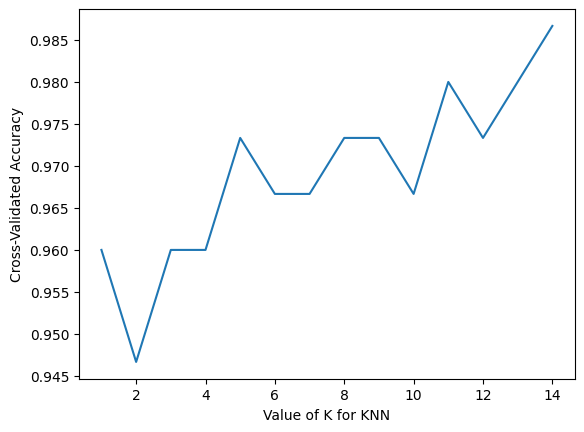

In [25]:
#plotting the value of k for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [26]:
#optimum model
knn = KNeighborsClassifier(n_neighbors = 14)

#prinyting scores
print(scores)

[1.  1.  0.9 1.  1.  1.  1.  1.  1.  0.9 1.  1.  1.  1.  1. ]


In [27]:
#printing mean scores
print(scores.mean())

0.9866666666666667
